# Retail Sales EDA and Product Category Classification using KMeans Clustering.

### Overall Objective.

This project seeks to conduct an ehaustive exploratory data analysis on a sample retail sales dataset that majorly focuses on three main product categories.It aslo investigates consumer behavior and the various boom and recession time periods for the sample retail store. The fore-developed kmeans model seeks predict which product category a customer might purchase based on their age and revenue.

### Table of Contents.

1. Loading the required libraries.
2. Loading the dataset.
3. ETL and Data Wrangling. 
4. Exploratory Data Analysis.
5. Developing the customer segmentation model.
6. Application

### Loading the required libraries

In [4]:
import numpy as np
import pandas as pd
import scipy 
import sklearn
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

### Loading the dataset

In [13]:
df = pd.read_csv("retail_sales_dataset.csv")

In [17]:
# first 5 rows 

df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


### ETL and Data Wrangling

#### 1) Datatypes in the dataset

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


#### 2) Null Values

In [24]:
## checking for any null values in the dataset

df.isnull().sum()

Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64

#### 3) Duplicates

In [27]:
## checking for any duplicates in the dataset

df.duplicated().sum()

0

#### 4 ) Removing unwanted columns

In [30]:
# removing redudant columns

df1 = df.drop(["Transaction ID"], axis = 1)

df1.tail(3)

,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
997,2023-10-29,CUST998,Female,23,Beauty,4,25,100
998,2023-12-05,CUST999,Female,36,Electronics,3,50,150
999,2023-04-12,CUST1000,Male,47,Electronics,4,30,120


#### 5) Renaming Columns 

In [36]:
## Renaming the columns to more concise and descriptive names

df1 = df1.rename(columns = {
    "Price per Unit" : "Unit Price",
    "Total Amount" : "Revenue",
    "Product Category": "Category",
    "Date" : "Date of Sale"
})

#### 6) Adding Columns

In [113]:
# Adding the year, day and month column

df1["Year"] = pd.DatetimeIndex(df1["Date of Sale"]).year 
df1["Month"] = pd.DatetimeIndex(df1["Date of Sale"]).month 
df1["Day"] = pd.DatetimeIndex(df1["Date of Sale"]).day

df1.head(11)

,Date of Sale,Customer ID,Gender,Age,Category,Quantity,Unit Price,Revenue,Year,Month,Day
0,2023-11-24,CUST001,Male,34,Beauty,3,50,150,2023,11,24
1,2023-02-27,CUST002,Female,26,Clothing,2,500,1000,2023,2,27
2,2023-01-13,CUST003,Male,50,Electronics,1,30,30,2023,1,13
3,2023-05-21,CUST004,Male,37,Clothing,1,500,500,2023,5,21
4,2023-05-06,CUST005,Male,30,Beauty,2,50,100,2023,5,6
5,2023-04-25,CUST006,Female,45,Beauty,1,30,30,2023,4,25
6,2023-03-13,CUST007,Male,46,Clothing,2,25,50,2023,3,13
7,2023-02-22,CUST008,Male,30,Electronics,4,25,100,2023,2,22
8,2023-12-13,CUST009,Male,63,Electronics,2,300,600,2023,12,13
9,2023-10-07,CUST010,Female,52,Clothing,4,50,200,2023,10,7


#### 7) Renaming the month column values

In [88]:
df1["Month"] = df1["Month"].replace({
    1 : "January",
    2 : "February",
    3 : "March",
    4 : "April",
    5 : "May",
    6 : "June",
    7 : "July",
    8 : "August",
    9 : "September",
    10 : "October",
    11 : "November",
    12 : "December"
})

df1.tail(7)

,Date of Sale,Customer ID,Gender,Age,Category,Quantity,Unit Price,Revenue,Year,Month,Day
993,2023-12-18,CUST994,Female,51,Beauty,2,500,1000,2023,December,18
994,2023-04-30,CUST995,Female,41,Clothing,1,30,30,2023,April,30
995,2023-05-16,CUST996,Male,62,Clothing,1,50,50,2023,May,16
996,2023-11-17,CUST997,Male,52,Beauty,3,30,90,2023,November,17
997,2023-10-29,CUST998,Female,23,Beauty,4,25,100,2023,October,29
998,2023-12-05,CUST999,Female,36,Electronics,3,50,150,2023,December,5
999,2023-04-12,CUST1000,Male,47,Electronics,4,30,120,2023,April,12


### Exploratory Data Analysis

#### 1) Data Analysis

In [90]:
print("Total Number of Customers:", df1["Customer ID"].count())

Total Number of Customers: 1000


In [92]:
print("Total Quantity of Products Sold:", df1["Quantity"].sum())

Total Quantity of Products Sold: 2514


In [94]:
print("Average Revenue:", df1["Revenue"].mean())

Average Revenue: 456.0


In [96]:
# various product categories

Product_Categories = pd.DataFrame(df1["Category"].unique())
Product_Categories = Product_Categories.rename(columns = {0 : "Category"})
Product_Categories

,Category
0,Beauty
1,Clothing
2,Electronics


In [98]:
print("Average Customer Age:", df1["Age"].mean())

Average Customer Age: 41.392


In [100]:
print("Average Price:", df1["Unit Price"].mean())

Average Price: 179.89


In [102]:
# The Most Preferred Product Category

df1["Category"].mode()

0    Clothing
Name: Category, dtype: object

In [104]:
## median Customer age

df1["Age"].median()

42.0

In [106]:
## Most common customer gender

df1["Gender"].mode()

0    Female
Name: Gender, dtype: object

In [108]:
## Month with the highest revenue

df1["Month"].mode()

0    May
Name: Month, dtype: object

In [110]:
## median quantity

df1["Quantity"].median()

3.0

#### 2 ) Data Visualizations

##### Time Series Analysis - Day with the highest revenue

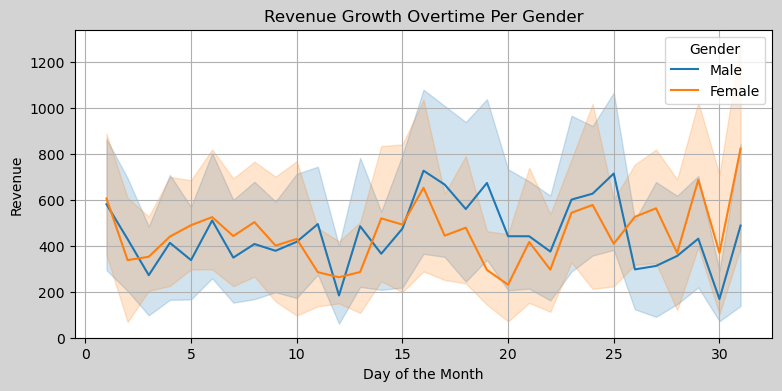

In [199]:
plt.figure(figsize = (9,4), facecolor="lightgrey")
sb.lineplot(df1, x= "Day", y="Revenue", hue="Gender")
plt.title("Revenue Growth Overtime Per Gender", loc = "center")
plt.xlabel("Day of the Month")
plt.grid(True)

##### Interpretations:
1. On the 20th day of each month, less revenue is collected from female customers.
2. On the 30th day of each month, less revenue is collected from male customers.
3. On the 16th day of each month, more revenue is collected from male customers.
4. On the 31st day of each month, more revenue is collected from female customers.

#### 2. The most expensive product category.

Text(0.5, 1.0, 'Total Price Per Product Category')

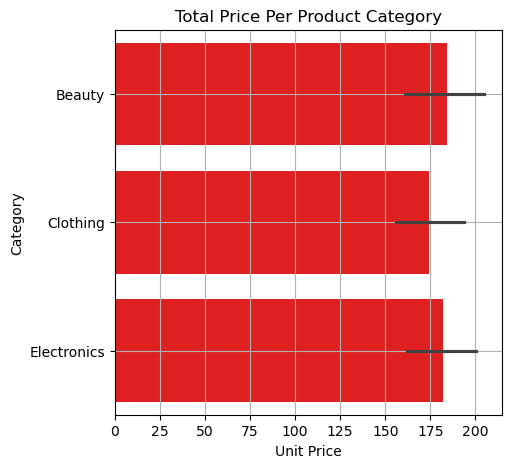

In [132]:
plt.figure(figsize = (5,5))
sb.barplot(df1, x = "Unit Price", y = "Category", color="red")
plt.grid(True)
plt.title("Total Price Per Product Category")

##### Interpretation:
Beauty products are the most expensive while clothing products are the cheapest among the three categories

#### 3. Supply for Goods per Gender

Text(0.5, 1.0, 'Supply for Goods Per Gender')

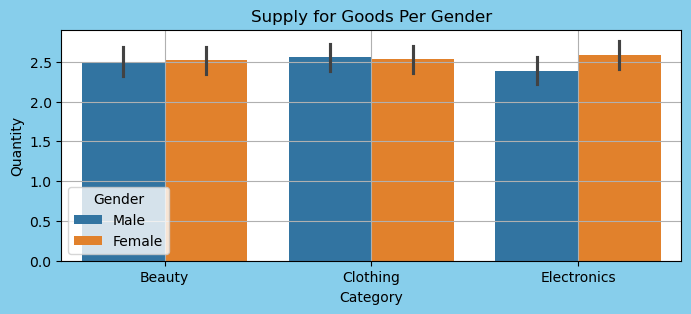

In [183]:
plt.figure(figsize = (8,3), facecolor="skyblue")
sb.barplot(df1, x = "Category", y = "Quantity", hue = "Gender")
plt.grid(True)
plt.title("Supply for Goods Per Gender")

##### Interpretations:
1. Electronic products are supplied more to female customers over other catgories.
2. Clothing is supplied more to male customers over other product categories.

#### 4) Month with the highest revenue

Text(0.5, 1.0, 'Revenue Distribution Overtime Per Product Category')

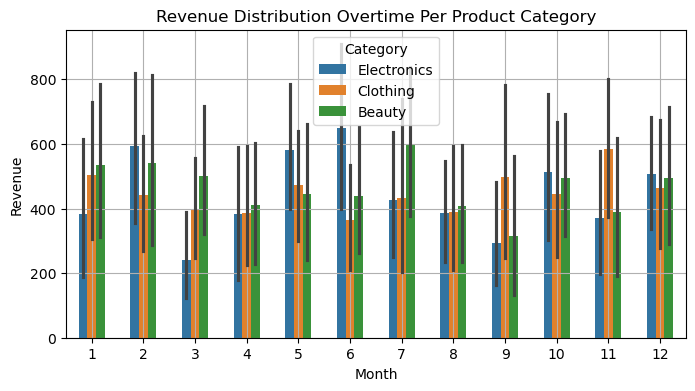

In [187]:
plt.figure(figsize = (8,4), facecolor="white")
sb.barplot(df1, x = "Month", y = "Revenue", hue = "Category", width = 0.5)
plt.grid(True)
plt.title("Revenue Distribution Overtime Per Product Category")

##### Interpretations:
1. Electronic products generate the most revenue in the month of June.
2. Clothing products earn the most revenue in the month of November.
3. Beauty Products earn the most reveniue in the month of June.

#### 5) Relationship Between Variables

Text(0.5, 1.0, 'Relationship Between Variables')

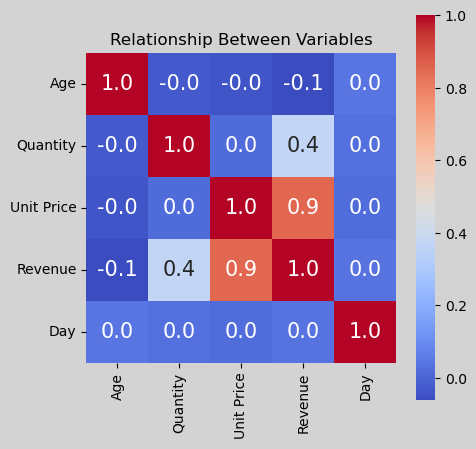

In [195]:
numeric = df1.drop(["Month", "Year", "Date of Sale", "Customer ID", "Category", "Gender"], axis = 1)

relationship = numeric.corr()

plt.figure(facecolor="lightgrey", figsize=(5,5))
sb.heatmap(relationship , annot=True, cbar=True, annot_kws={"size" : 15}, cmap="coolwarm", square=True, robust=True, fmt=".1f")
plt.title("Relationship Between Variables")

#### 6) Distribution of the Revenue 

C:\Users\Alvin\AppData\Local\Temp\ipykernel_63780\136010891.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(df1["Revenue"], color="darkblue")


Text(0.5, 1.0, 'Revenue Distribution')

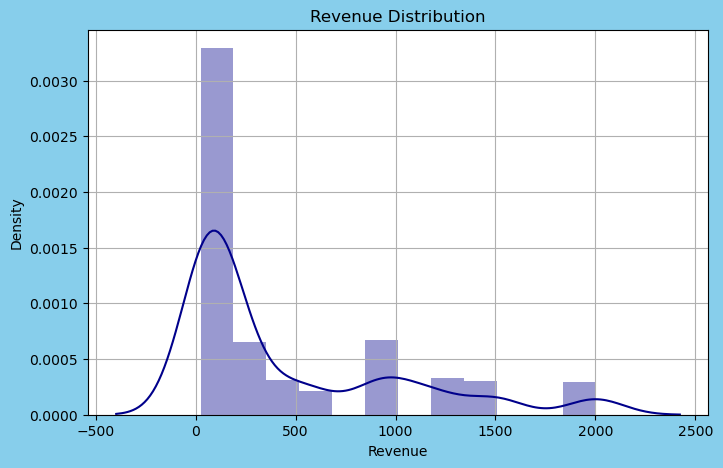

In [204]:
plt.figure(figsize=(8,5), facecolor="skyblue")
sb.distplot(df1["Revenue"], color="darkblue")
plt.grid(True)
plt.title("Revenue Distribution")

##### Interpretation: 
The more observations are found towards the left of the mean thus making the distribution to the skewed to the left.

### Developing the customer segmentation model accoding to the various categories using KMeans Clustering.

#### 1) Dropping unwanted columns for the model

In [291]:
data = df1.drop(["Month", "Year", "Date of Sale", "Customer ID", "Gender", "Quantity", "Unit Price", "Day"], axis = 1)

data.head(3)

,Age,Category,Revenue
0,34,Beauty,150
1,26,Clothing,1000
2,50,Electronics,30


#### 2) Replacing the values in the Category Column

In [293]:
data["Category"] = data["Category"].replace({
    "Beauty" : 1,
    "Clothing" : 2,
    "Electronics" : 3
})

C:\Users\Alvin\AppData\Local\Temp\ipykernel_63780\3950350452.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data["Category"] = data["Category"].replace({


#### 3) Defining the dependent and independent variables

In [336]:
X = data.drop(["Category"], axis = 1)
y = data["Category"]

#### 4) Normalizing the data

In [353]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler() #loading the scaler
X = sc.fit_transform(X,y)
X,y

(array([[-0.54056476, -0.5467043 ],
        [-1.12559156,  0.97191876],
        [ 0.62948884, -0.76109815],
        ...,
        [-1.34497661, -0.63603507],
        [-0.39430806, -0.5467043 ],
        [ 0.41010379, -0.60030276]]),
 0      1
 1      2
 2      3
 3      2
 4      1
       ..
 995    2
 996    1
 997    1
 998    3
 999    3
 Name: Category, Length: 1000, dtype: int64)

#### 5) Finding the optimum number of clusters

In [355]:
from sklearn.cluster import KMeans

sse = [] ## sum of squared errors
for k in range(1, 11):
    km = KMeans(n_clusters=k, random_state=3)
    km.fit(X)
    sse.append(km.inertia_)

#### 6) Plotting the Elbow Graph

[Text(0.5, 0, 'Number of cluster (k)'),
 Text(0, 0.5, 'Sum Squared Error'),
 Text(0.5, 1.0, 'Elbow Method')]

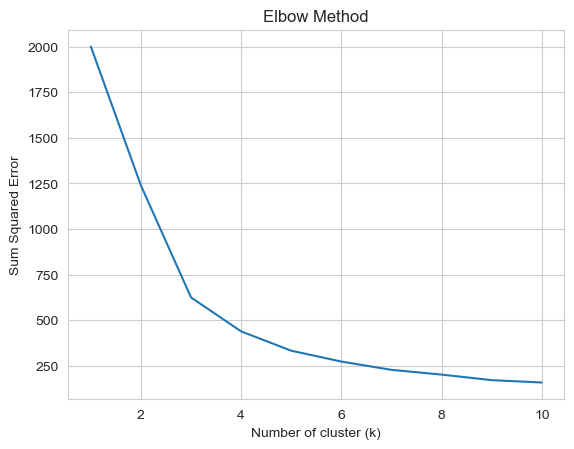

In [357]:
sb.set_style("whitegrid")
a = sb.lineplot(x = range(1,11), y =sse)

a.set(xlabel ="Number of cluster (k)",
      ylabel = "Sum Squared Error",
      title ='Elbow Method')

##### Interpretation:
From the above graph, at k=2, k=4 and k=6 there is an elbow like situation. In this case, k=3 is considered.

#### 7) Fitting the model

In [359]:
kmeans = KMeans(n_clusters=3, random_state=3)
kmeans.fit(X)

KMeans(n_clusters=3, random_state=3)

#### 8) Finding the cluster centers

In [361]:
kmeans.cluster_centers_

array([[-0.1891167 ,  1.57725722],
       [ 0.83894076, -0.4682313 ],
       [-0.93275907, -0.5174857 ]])

#### 9) Predicting the cluster groups

In [363]:
pred = kmeans.predict(X)
pred

array([2, 0, 1, 2, 2, 1, 1, 2, 1, 1, 2, 2, 0, 1, 0, 0, 2, 1, 1, 2, 1, 2,
       2, 1, 1, 0, 2, 1, 1, 0, 0, 2, 1, 1, 1, 0, 2, 2, 2, 1, 2, 2, 1, 2,
       1, 0, 0, 1, 0, 2, 2, 2, 2, 0, 2, 0, 1, 0, 1, 2, 2, 2, 1, 1, 0, 1,
       0, 2, 1, 1, 1, 0, 2, 0, 1, 2, 1, 0, 2, 1, 2, 2, 1, 2, 2, 2, 2, 1,
       0, 1, 1, 1, 0, 0, 2, 1, 0, 1, 0, 1, 2, 1, 1, 0, 2, 1, 0, 2, 0, 0,
       0, 0, 1, 2, 0, 2, 0, 0, 1, 1, 2, 1, 2, 0, 1, 2, 2, 2, 2, 1, 2, 1,
       2, 1, 2, 1, 0, 1, 0, 2, 2, 0, 1, 0, 2, 2, 2, 2, 2, 1, 2, 0, 1, 0,
       0, 1, 0, 1, 2, 1, 1, 2, 1, 0, 0, 0, 1, 1, 0, 2, 0, 2, 1, 2, 2, 1,
       1, 2, 2, 0, 0, 1, 0, 2, 2, 2, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 2, 1, 0, 0, 2, 1, 1, 1, 2, 2, 2, 0, 0, 0, 2, 0, 1, 2, 1, 1, 1,
       2, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 0, 1, 0, 2, 0, 2, 2, 2,
       0, 2, 1, 1, 1, 0, 2, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1, 2, 2, 2, 2, 0,
       1, 2, 2, 2, 0, 1, 1, 1, 2, 0, 0, 2, 2, 2, 1, 0, 0, 1, 2, 1, 2, 1,
       1, 2, 1, 2, 1, 0, 1, 2, 0, 0, 0, 0, 1, 2, 2,

#### 10) Plotting the cluster with center points based on customer age.

Text(0, 0.5, 'Product Categories')

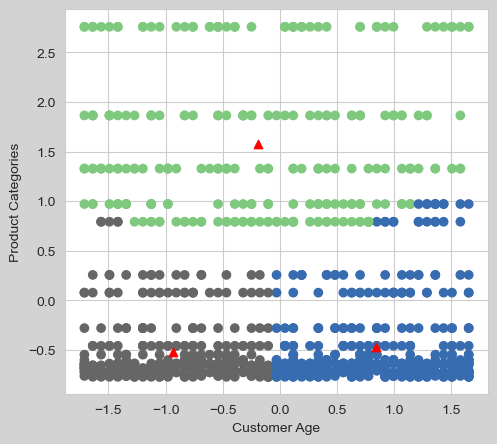

In [365]:
import matplotlib.cm as cm

plt.figure(facecolor="lightgrey", figsize=(12,5))
plt.subplot(1,2,1)
plt.scatter(X[:,0], X[:,1],c = pred, cmap=cm.Accent)
plt.grid(True)
for center in kmeans.cluster_centers_:
    center = center[:2]
    plt.scatter(center[0],center[1],marker = '^',c = 'red')
plt.xlabel("Customer Age")
plt.ylabel("Product Categories")

##### Interpretation 
The above plot shows the normalized customer age vs the product categories with the datapoints pointed by clusters and red markers indicate K-means cluster centers.

### Application: 

This model is very useful in classifying customers based on their preference resulting to futher market research and business expansions.